In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
df= pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


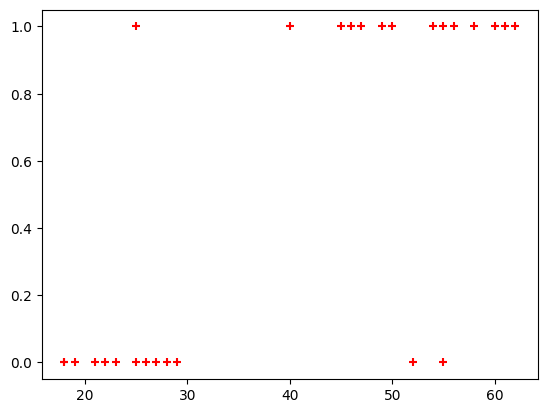

In [61]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [65]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
y_predicted = model.predict(X_test)

In [67]:
model.predict_proba(X_test)

array([[0.79396477, 0.20603523],
       [0.37087194, 0.62912806],
       [0.90785547, 0.09214453],
       [0.02158257, 0.97841743],
       [0.920135  , 0.079865  ],
       [0.05338739, 0.94661261]])

In [68]:
model.score(X_test,y_test)

0.8333333333333334

In [69]:
y_predicted

array([0, 1, 0, 1, 0, 1])

In [70]:
X_test

,age
11,28
22,40
0,22
9,61
20,21
6,55


In [71]:
(model.coef_,model.intercept_)

(array([[0.15645583]]), array([-5.72975513]))

DEFINE SIGMOID FUNCTION

In [72]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))
    
    

In [73]:
def prediction_function(age):
    z = 0.1569*age - 6.5818
    y = sigmoid(z)
    return y

In [74]:
age = 42
prediction_function(age)

0.5019999893334016

In [75]:
age = 28
prediction_function(age)

0.1007788941854592

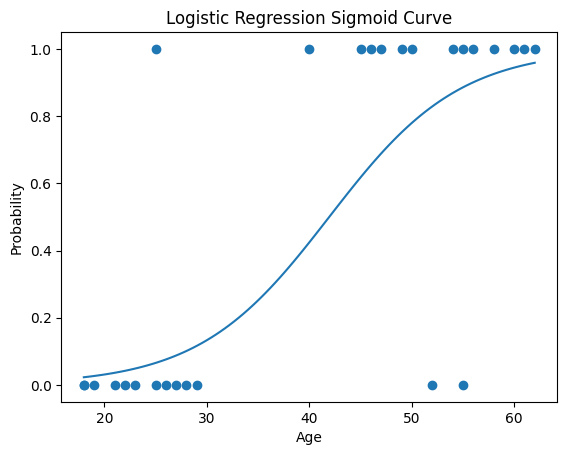

In [76]:
import numpy as np

age_range = np.linspace(df["age"].min(), df["age"].max(), 100)
probabilities = [prediction_function(age) for age in age_range]

plt.scatter(df["age"], df["bought_insurance"])   # actual points
plt.plot(age_range, probabilities)                # sigmoid curve
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Logistic Regression Sigmoid Curve")
plt.show()



In [77]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [78]:
left = df[df.left==1]
left.shape

(3571, 10)

In [79]:
retained = df[df.left==0]
retained.shape

(11428, 10)

<Axes: xlabel='salary'>

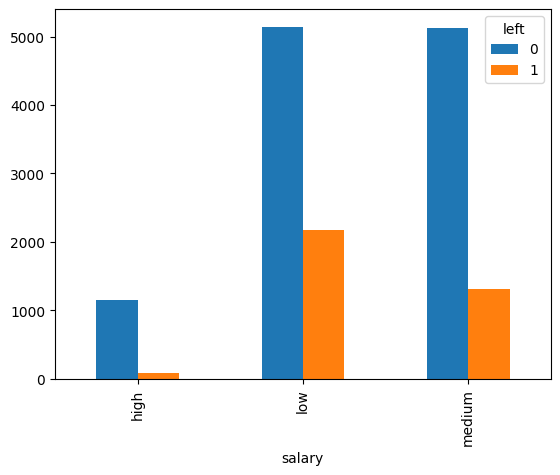

In [82]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

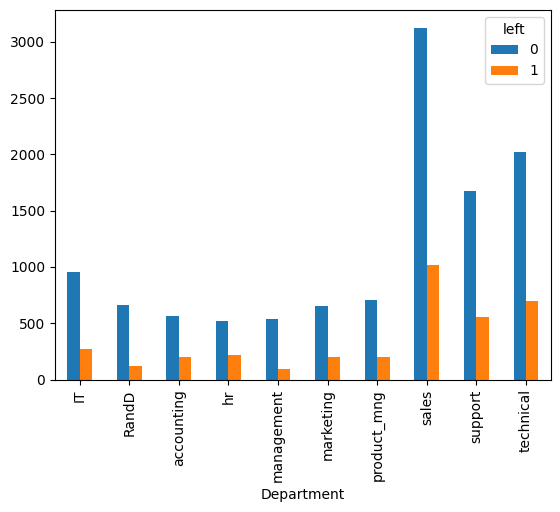

In [83]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [84]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [85]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [86]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [87]:
df_with_dummies.drop(['salary','salary_medium'],axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True


In [88]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True


In [89]:
y = df.left

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [92]:
model.fit(X_train, y_train)

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [93]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [94]:
model.score(X_test,y_test)

0.7767619047619048

MULTICLASS LOGISTIC REG

In [95]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

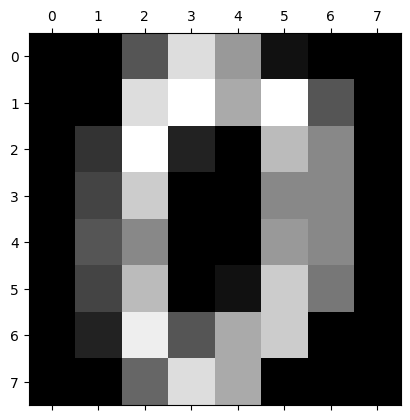

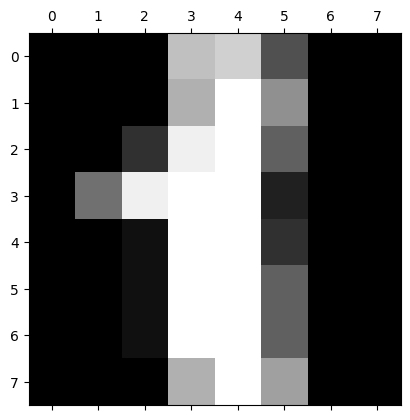

In [97]:
plt.gray() 
for i in range(2):
    plt.matshow(digits.images[i]) 

In [98]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [99]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [103]:
model.fit(X_train, y_train)

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [104]:
model.score(X_test, y_test)

0.9638888888888889

In [105]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

Confusion Matrix

In [107]:
y_predicted = model.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 39,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 31,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 37,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

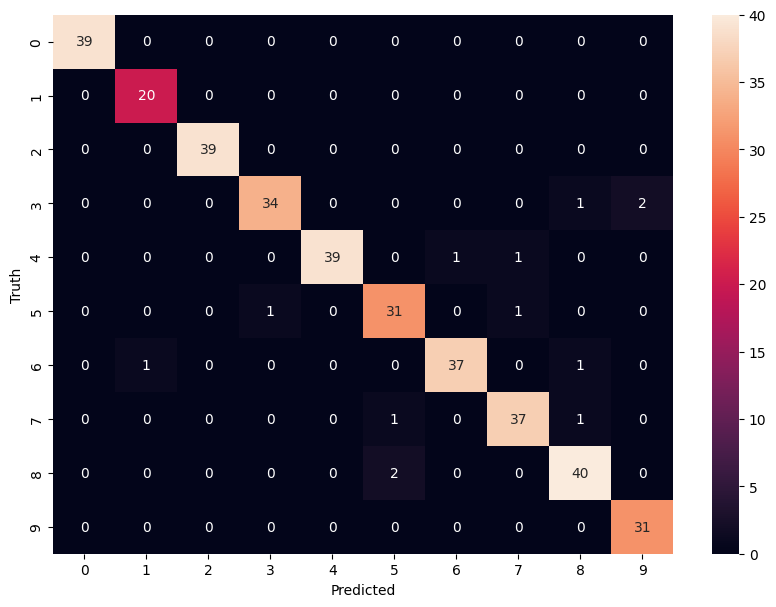

In [109]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [110]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
iris = load_iris()

In [ ]:
X = iris.data      
y = iris.target 

In [117]:
X.shape , y.shape  
   


((150, 4), (150,))

In [125]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)


In [126]:
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [127]:
y_pred = model.predict(X_test)


In [128]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [129]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]


In [130]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # example

prediction = model.predict(new_flower)
prediction


array([0])

In [131]:
iris.target_names[prediction]


array(['setosa'], dtype='<U10')

In [132]:
import matplotlib.pyplot as plt

In [133]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [135]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target


In [136]:
sepal_length = X[:, 0]   # column 0
sepal_width  = X[:, 1] 

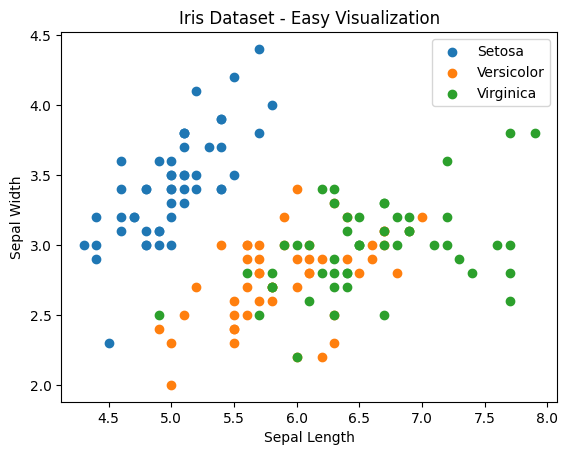

In [137]:
plt.scatter(sepal_length[y==0], sepal_width[y==0], label="Setosa")
plt.scatter(sepal_length[y==1], sepal_width[y==1], label="Versicolor")
plt.scatter(sepal_length[y==2], sepal_width[y==2], label="Virginica")

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("Iris Dataset - Easy Visualization")
plt.show()
